# Data Preprocessing

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

###Install yahoo finance library

In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=4e389bdf0a8bc451fad83e2b336014f9f11b40d25cbddcec2fecc51d7509bea5
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


### Import dataset from yahoo finance

In [3]:
import yfinance as yf
dataset = yf.download('AAPL', start='2010-01-01', end='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.604801,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656428,6.616219,601904800
2010-01-06,7.656428,7.686786,7.526786,7.534643,6.510980,552160000
2010-01-07,7.562500,7.571429,7.466072,7.520714,6.498945,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.542150,447610800


## Checking for Missing values

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data columns with null value(s): 
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


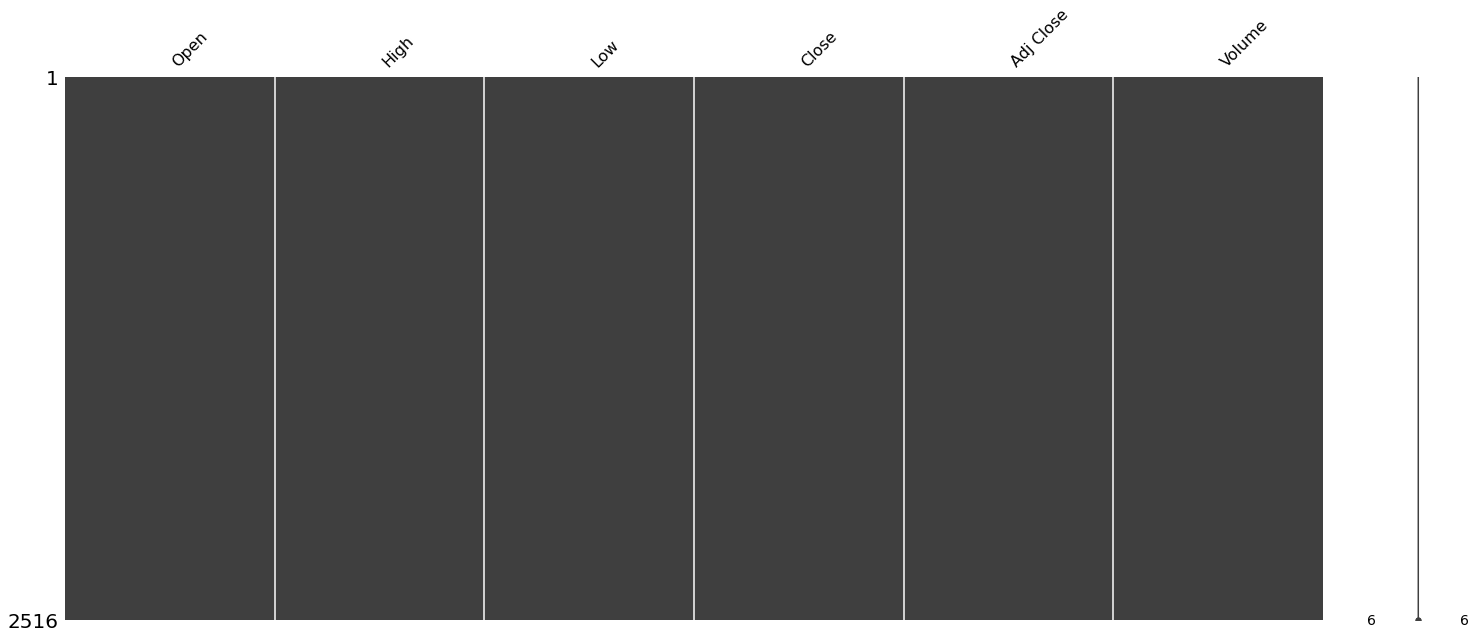

In [5]:
import missingno as msno
msno.matrix(dataset)
print('Data columns with null value(s): ', dataset.isnull().sum(), sep='\n')

## New product release

In [6]:
def get_date(datetime):
  return str(pd.to_datetime(datetime).date())

In [7]:
dates = []
for i in range(len(dataset.index)):
  dates.append(get_date(dataset.index.values[i]))

In [8]:
new_product = np.zeros(len(dataset.axes[0]))

# The below dates only include iPhone, iPad, and Apple Watch releases.
# Source: https://en.wikipedia.org/wiki/Timeline_of_Apple_Inc._products
new_product_release_dates = ['2010-04-03', '2010-04-30', '2010-06-24', '2010-09-01',
                             '2011-02-10', '2011-03-11', '2011-10-14',
                             '2012-03-16', '2012-09-21', '2012-11-02', '2012-11-16',
                             '2013-09-20', '2013-11-01', '2013-11-12',
                             '2014-11-18', '2014-09-19', '2014-10-22',
                             '2015-04-24', '2015-09-09', '2015-09-25', '2015-11-11',
                             '2016-03-31', '2016-09-07', '2016-09-07', '2016-09-16', '2016-10-28', '2016-12-19',
                             '2017-03-21', '2017-03-24', '2017-06-05', '2017-09-22', '2017-11-03',
                             '2018-03-27', '2018-09-21', '2018-10-26', '2018-10-30', '2018-11-07',
                             '2019-03-18', '2019-03-20', '2019-09-20', '2019-09-25', '2019-12-10']

new_product_release_data_in_2020 = ['2020-03-18', '2020-04-24']

for i in range(0,len(dataset.axes[0])):
  if dates[i] in new_product_release_dates:
    new_product[i] = 1

In [9]:
dataset['new product'] = new_product

In [10]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,new product
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.604801,493729600,0.0
2010-01-05,7.664286,7.699643,7.616071,7.656428,6.616219,601904800,0.0
2010-01-06,7.656428,7.686786,7.526786,7.534643,6.510980,552160000,0.0
2010-01-07,7.562500,7.571429,7.466072,7.520714,6.498945,477131200,0.0
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.542150,447610800,0.0


## Get training set

In [11]:
training_set = dataset.iloc[:, [3,5,6]].values

In [12]:
print(training_set)

[[7.64321423e+00 4.93729600e+08 0.00000000e+00]
 [7.65642834e+00 6.01904800e+08 0.00000000e+00]
 [7.53464270e+00 5.52160000e+08 0.00000000e+00]
 ...
 [7.24499969e+01 1.46266000e+08 0.00000000e+00]
 [7.28799973e+01 1.44114400e+08 0.00000000e+00]
 [7.34124985e+01 1.00805600e+08 0.00000000e+00]]


## Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(training_set)

In [14]:
print(train_scaled)

[[0.01178427 0.24422195 0.        ]
 [0.01198282 0.30315535 0.        ]
 [0.01015293 0.27605459 0.        ]
 ...
 [0.98553794 0.05492523 0.        ]
 [0.99199891 0.05375304 0.        ]
 [1.         0.03015859 0.        ]]


## Creating a data structure with 60 time steps and 1 output

In [15]:
X_train = []
y_train = []

n_past = 100 #number of days in the past we want to take under consideration
n_future = 1 #number of days we want to predict in the future

for i in range(n_past, len(train_scaled) - n_future + 1):
  X_train.append(train_scaled[i - n_past:i, :])
  y_train.append(train_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Build the RNN

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [17]:
regressor = Sequential()

## Add four LSTM layers and dropout regularisation

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [23]:
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

ValueError: ignored

## Add the output layer

In [22]:
regressor.add(Dense(units = 1))

## Compiling the RNN

In [24]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting RNN to training set

In [25]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')

history = regressor.fit(X_train, y_train, shuffle=True,
                        epochs=15, callbacks=[es, rlr,mcp, tb], validation_split=0.2, verbose=1, batch_size=64)

Epoch 1/15
 1/31 [..............................] - ETA: 0s - loss: 0.0761WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
31/31 [==============================] - ETA: 0s - loss: 0.0096
Epoch 00001: val_loss improved from inf to 0.01492, saving model to weights.h5
31/31 [==============================] - 9s 298ms/step - loss: 0.0096 - val_loss: 0.0149
Epoch 2/15
31/31 [==============================] - ETA: 0s - loss: 0.0015
Epoch 00002: val_loss improved from 0.01492 to 0.00626, saving model to weights.h5
31/31 [==============================] - 8s 257ms/step - loss: 0.0015 - val_loss: 0.0063
Epoch 3/15
31/31 [==============================] - ETA: 0s - loss: 0.0011
Epoch 00003: val_loss improved from 0.00626 to 0.00352, saving model to weights.h5
31/31 [====

# Making predictions

## Get real price

In [26]:
dataset_test = yf.download('AAPL', start='2020-01-01', end='2020-07-01')
real_stock_price = dataset_test.iloc[:, 1:2].values

[*********************100%***********************]  1 of 1 completed


In [27]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.573036,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.848030,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.436470,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,74.086395,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,75.278160,132079200


## Add new product release date to real price

In [28]:
dates_2020 = []
for i in range(len(dataset_test.index)):
  dates_2020.append(get_date(dataset_test.index.values[i]))

In [29]:
new_product_2020 = np.zeros(len(dataset_test))
for i in range(0,len(dataset_test.axes[0])):
  if dates_2020[i] in new_product_release_data_in_2020:
    new_product_2020[i] = 1

In [30]:
dataset_test['new product'] = new_product_2020

In [33]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume,new product
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.573036,135480400,0.0
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.848030,146322800,0.0
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.436470,118387200,0.0
2020-01-07,74.959999,75.224998,74.370003,74.597504,74.086395,108872000,0.0
2020-01-08,74.290001,76.110001,74.290001,75.797501,75.278160,132079200,0.0


## Get predicted price

In [36]:
dataset_total = pd.concat((dataset, dataset_test), axis = 0)

In [60]:
combined_data = dataset_total[['Adj Close', 'Volume', 'new product']]

In [71]:
inputs = combined_data.iloc[(len(combined_data) - len(dataset_test) - n_past):].values
inputs = sc.transform(inputs)

In [72]:
inputs.shape

(225, 3)

In [ ]:
print(inputs)

In [75]:
X_test = []
for i in range(n_past, n_past + len(dataset_test)):
  X_test.append(inputs[i - n_past:i, :])

X_test = np.array(X_test)
type(X_test)
X_test.shape
#X_test = np.asarray(X_test).astype(np.float32)


(125, 100, 3)

In [76]:
predicted_stock_price = regressor.predict(X_test)

In [78]:
from sklearn.preprocessing import StandardScaler
sc_predict = StandardScaler()
sc_predict.fit_transform(real_stock_price)

predicted_stock_price = sc_predict.inverse_transform(predicted_stock_price)


# Visualize

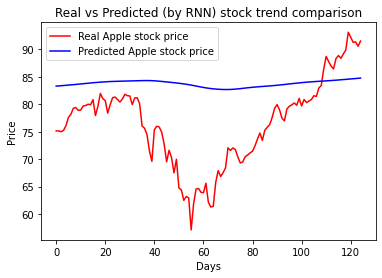

In [80]:
plt.plot(real_stock_price, color='red', label='Real Apple stock price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Apple stock price')
plt.title('Real vs Predicted (by RNN) stock trend comparison')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()